Training Accuracy: 1.0
Testing Accuracy: 0.9996371850239341
Precision: 0.9411764705882353
Recall: 0.8235294117647058
F1 Score: 0.8784313725490196
Matthews Corr Coeff: 0.8802145508756808


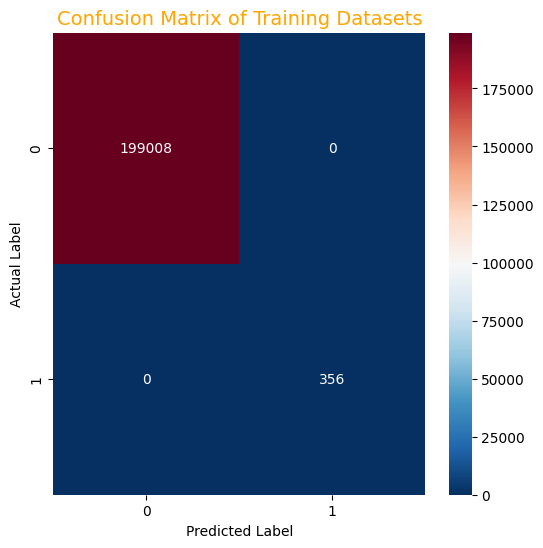

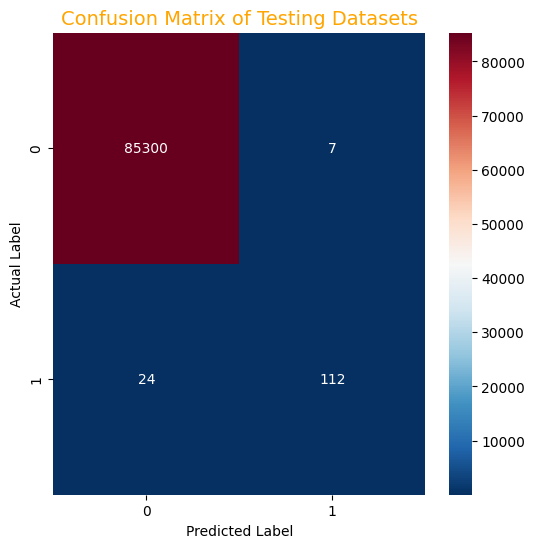

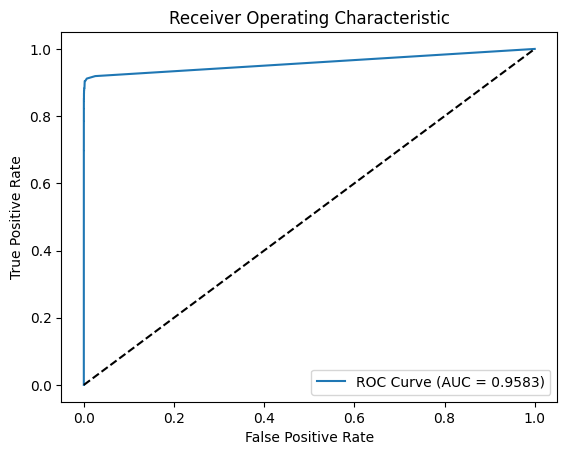

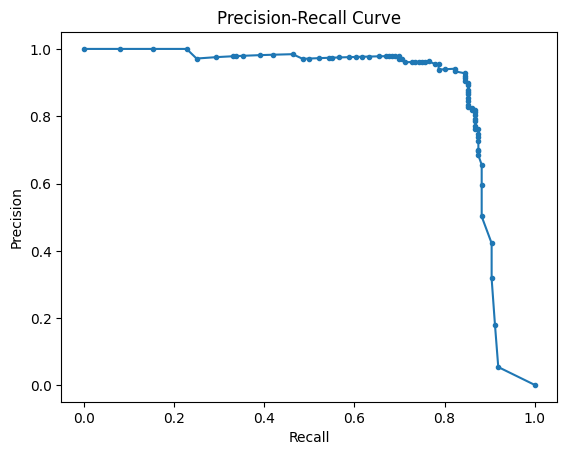

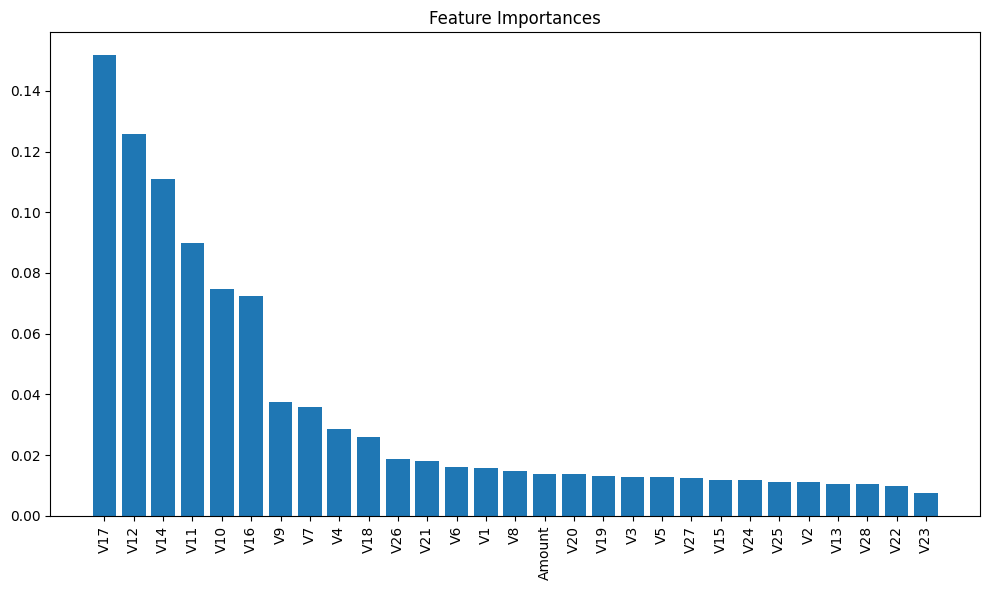

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("creditcard.csv")

# Normalize 'Amount' column
from sklearn.preprocessing import StandardScaler
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

# Drop 'Time' column
data = data.drop(['Time'], axis=1)

# Split data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, roc_curve, auc, precision_recall_curve

# Print metrics
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("Matthews Corr Coeff:", matthews_corrcoef(y_test, y_test_pred))

# === Confusion Matrix for Training Data ===
train_cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(train_cm, annot=True, fmt="d", cmap="RdBu_r")
plt.title("Confusion Matrix of Training Datasets", color="orange", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# === Confusion Matrix for Testing Data ===
test_cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="RdBu_r")
plt.title("Confusion Matrix of Testing Datasets", color="orange", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# === ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# === Precision-Recall Curve ===
precisions, recalls, _ = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# === Feature Importance ===
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()
